## Data Sources
<ul>
<li> new_clean_data : Cleaned data with dynamic cleaning
<li> new_clean_data_v2 : Every df has the same feature set

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv

filenames = open('filenames.txt','r').read()
filenames = filenames.split('\n')[:-1]

file_count = len(filenames)

print(file_count)

554


In [13]:
def get_x_y_from_df(df):
    df = df.drop(columns=['Quarter end'])
    df = df.replace([np.inf, -np.inf], np.nan)
    df = df.dropna()
    X = df
    Y = X['Price']
    Y = Y[1:]

    #Getting Next Quarter %change of price 
    #This will be our target variable

    X = X[:-1]
    
    return X,Y

In [14]:
s=1
try:
    df = pd.read_csv(".All_Data/new_clean_data/"+str(filenames[0]), delimiter = ',')
    df.set_index("Unnamed: 0", inplace =True)
except:
    s=2

In [15]:
x,y = get_x_y_from_df(df)

#  Feature Importance

Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable

[0.04998446 0.02965661 0.05367543 0.01260842 0.03575941 0.04229794
 0.0233942  0.01680539 0.03142843 0.03511258 0.01943681 0.03700098
 0.04696673 0.01614287 0.11807947 0.05075227 0.00437334 0.02885243
 0.05096503 0.07219633 0.01820014 0.00536636 0.08016612 0.03063755
 0.06329913 0.02684161]


/home/anshul/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


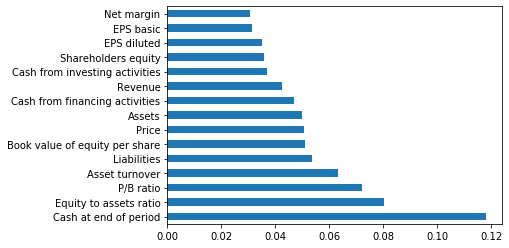

In [16]:
from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor()
model.fit(x,y)

print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(15).plot(kind='barh')

plt.show()

In [17]:
feat_importances.nlargest(15).index

Index(['Cash at end of period', 'Equity to assets ratio', 'P/B ratio',
       'Asset turnover', 'Liabilities', 'Book value of equity per share',
       'Price', 'Assets', 'Cash from financing activities', 'Revenue',
       'Cash from investing activities', 'Shareholders equity', 'EPS diluted',
       'EPS basic', 'Net margin'],
      dtype='object')

In [18]:
'''
NOW ONLY TAKING THE TOP 15 FEATURES
'''

x = x[feat_importances.nlargest(15).index]
np.shape(x)

(48, 15)

## correlation studies

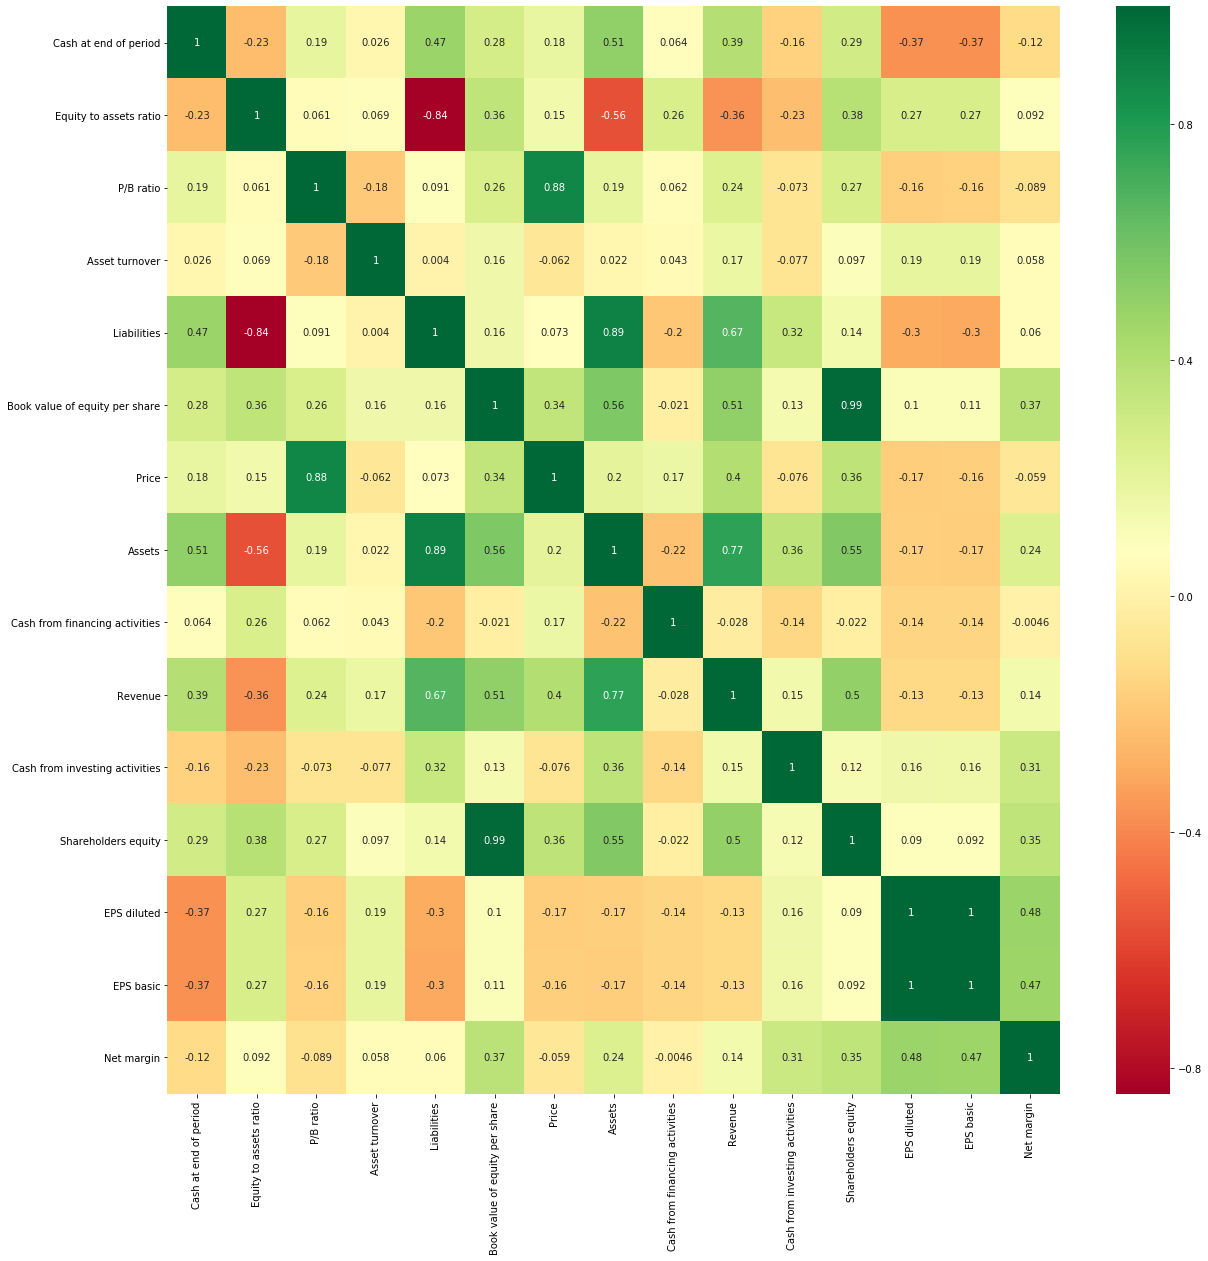

In [19]:
import seaborn as sns
# Create correlation matrix
corr_matrix = x.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

top_corr_features = corr_matrix.index

plt.figure(figsize=(20,20))

#plot heat map

g=sns.heatmap(x[top_corr_features].corr(),annot=True,cmap="RdYlGn")


In [20]:
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]
to_drop

['Shareholders equity', 'EPS basic']

In [21]:
# Drop features 
x = x.drop(x[to_drop], axis=1)
x

,Cash at end of period,Equity to assets ratio,P/B ratio,Asset turnover,Liabilities,Book value of equity per share,Price,Assets,Cash from financing activities,Revenue,Cash from investing activities,EPS diluted,Net margin
Unnamed: 0,,,,,,,,,,,,,
29,-0.019139,-0.039929,-0.029255,0.000000,0.054299,-0.008830,-0.019590,0.012512,0.893491,0.031250,-0.612903,-0.166667,0.035276
30,-0.275122,-0.040975,0.142466,0.000000,0.002146,-0.052339,0.132607,-0.035562,0.512500,0.040909,6.166667,0.500000,-0.048889
31,0.228802,-0.085452,-0.007194,0.153846,0.156317,0.023502,-0.057471,0.075456,-0.985537,0.052402,-0.732558,0.044444,-0.083333
32,-0.241512,-0.006307,-0.036232,0.000000,-0.007870,-0.002296,-0.014464,-0.012576,23.000000,-0.036653,3.275362,-0.340426,-0.066270
33,0.234657,-0.033145,-0.082707,0.013333,0.054130,0.008055,-0.084317,0.028824,-1.011905,0.045226,-0.945763,0.516129,0.056415
34,-0.040936,0.026988,0.060109,0.000000,-0.035857,0.017123,0.066939,-0.017331,-89.000000,-0.008242,2.750000,-0.042553,-0.036176
35,-0.143293,-0.185369,-0.190722,0.013158,0.119835,-0.184063,-0.175258,-0.013791,1.454545,0.025623,-0.533333,0.444444,0.072386
36,-0.030605,0.043301,-0.127389,-0.038961,-0.058836,0.024759,-0.288929,-0.036977,-0.886574,-0.212694,-0.607143,-0.723077,-0.043333
37,0.027900,0.024791,-0.222628,-0.027027,-0.094533,-0.053691,-0.203415,-0.081821,0.653061,-0.064322,0.545455,-2.611111,-0.389373


In [22]:
np.shape(x)

(48, 13)

# Making the Feature Selection Function

In [23]:
from sklearn.ensemble import ExtraTreesRegressor


def feature_selection(df):
    '''
    input: dataframe 
    
    Feature selection steps
    
    1. Feature Importance 
    
    The feature importance is used from ExtraTreesRegressor, Top 15 features selected
    
    2. Correlation
    
    Features with correlation > 90% are eliminated
    '''
    
    x,y = get_x_y_from_df(df)
    
    model = ExtraTreesRegressor()
    model.fit(x,y)
    feat_importances = pd.Series(model.feature_importances_, index=x.columns)
    
    '''
    NOW ONLY TAKING THE TOP 15 FEATURES
    '''

    x = x[feat_importances.nlargest(15).index]
    
    corr_matrix = x.corr().abs()

    # Select upper triangle of correlation matrix
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

    top_corr_features = corr_matrix.index
    
    to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]
    
    x = x.drop(x[to_drop], axis=1)
    
    
    return x, y

In [32]:
b

Unnamed: 0
30    0.132607
31   -0.057471
32   -0.014464
33   -0.084317
34    0.066939
35   -0.175258
36   -0.288929
37   -0.203415
38    0.297604
39    0.275996
40    0.075019
41    0.161176
42   -0.029591
43   -0.025464
44    0.271613
45    0.204211
46    0.017695
47   -0.260402
48    0.103275
49    0.149417
50    0.066211
51   -0.260402
52    0.133501
53    0.059753
54    0.033551
55    0.113390
56    0.124317
57    0.012246
58    0.007294
59   -0.035676
60   -0.261172
61    0.007685
62    0.001230
63   -0.085258
64    0.053989
65   -0.029562
66    0.162815
67    0.035908
68    0.007194
69    0.130519
70    0.121961
71    0.081399
72    0.109358
73   -0.015789
74   -0.054199
75    0.019101
76    0.037037
77    0.128109
Name: Price, dtype: float64

Index(['Cash at end of period', 'Assets', 'P/B ratio', 'Asset turnover',
       'Book value of equity per share', 'Equity to assets ratio',
       'Current Assets', 'Revenue', 'Price', 'Liabilities', 'Earnings',
       'Cash from financing activities', 'Current ratio'],
      dtype='object')